# Welcome to Astroid Threat Classification
#### By Adithya Viswanathan

How to run the notebook:


1.   Import dataset (orbits - orbits.csv) into files section on left-hand side
2.   Go to Runtime, and click Run All
3.   Wait until it all runs (5-10 minutes)
4.   Go to View, and click Expand All Sections
5.   Enjoy!



# Data Preparation

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [154]:
#https://www.kaggle.com/shrushtijoshi/asteroid-impacts
data = pd.read_csv("orbits - orbits.csv")
numerical_data = data.drop(['Object Name', 'Classification', 'Hazardous'], axis=1)
data.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False


In [155]:
print("Number of Rows:", data.shape[0])
print("Number of Columns", data.shape[1])
data = data.dropna()
print(data.isnull().sum())

Number of Rows: 15635
Number of Columns 16
Object Name                                 0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
Classification                              0
Hazardous                                   0
dtype: int64


# Data Analysis

In [156]:
data['Hazardous'].value_counts()

False    13855
True      1779
Name: Hazardous, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


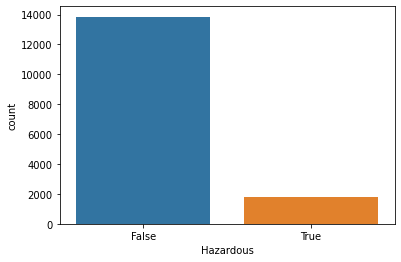

In [157]:
sns.countplot(data['Hazardous'])

[Text(68.99999999999999, 0.5, 'Asteroid Details\t'),
 Text(0.5, 69.0, '\nAsteroid Details'),
 Text(0.5, 1.0, 'Correlation matrix of Asteroid data\n')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


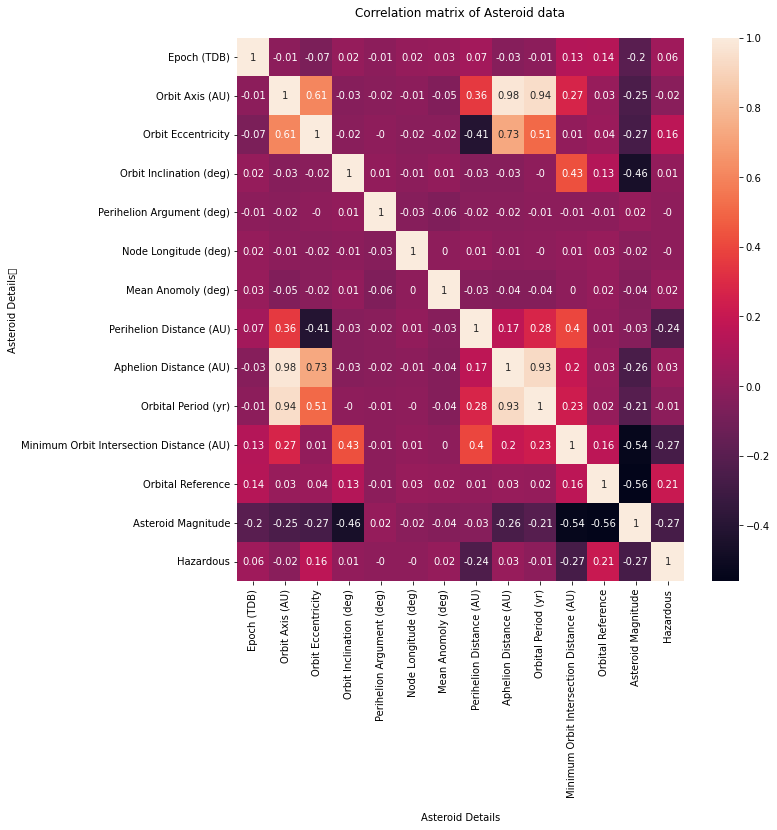

In [158]:
#https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(10,10))
hm = sns.heatmap(data=correlation_matrix, annot=True)
hm.set(xlabel='\nAsteroid Details', ylabel='Asteroid Details\t', title = "Correlation matrix of Asteroid data\n")

In [159]:
#https://stackoverflow.com/questions/29276301/max-and-min-value-for-each-colum-of-one-dataframe
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


ranges = numerical_data.apply(minMax).T.values.tolist()

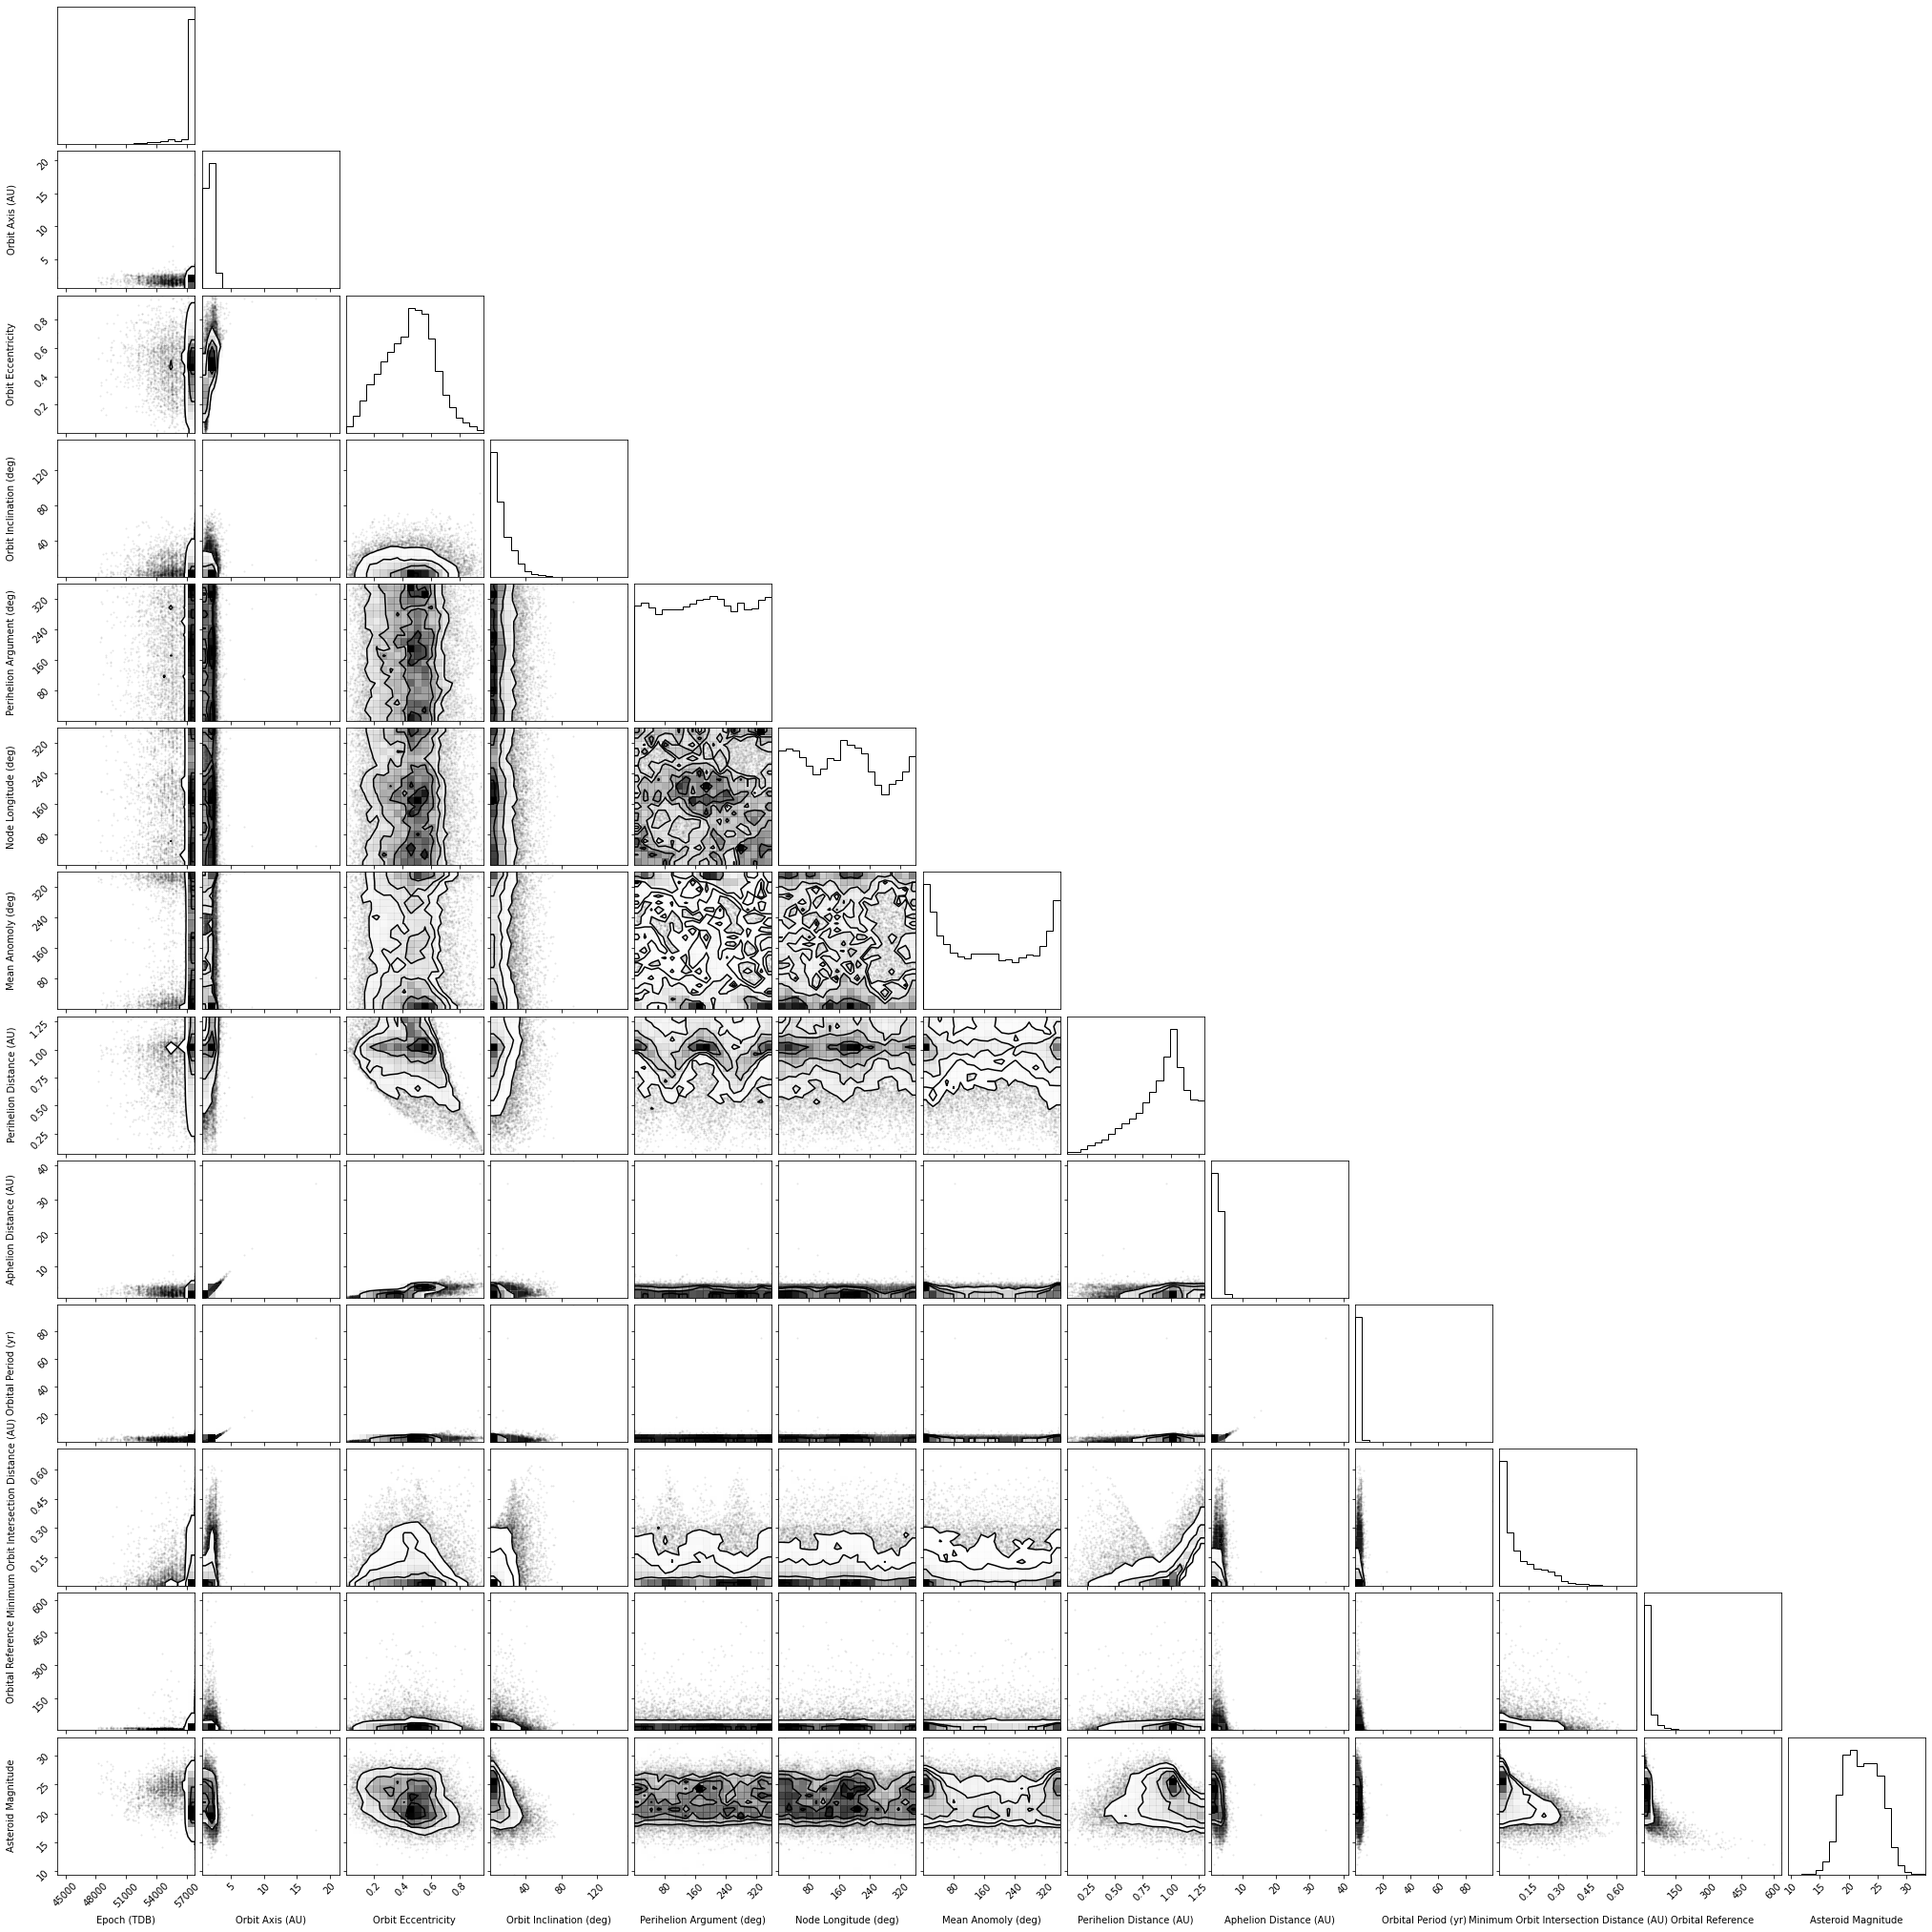

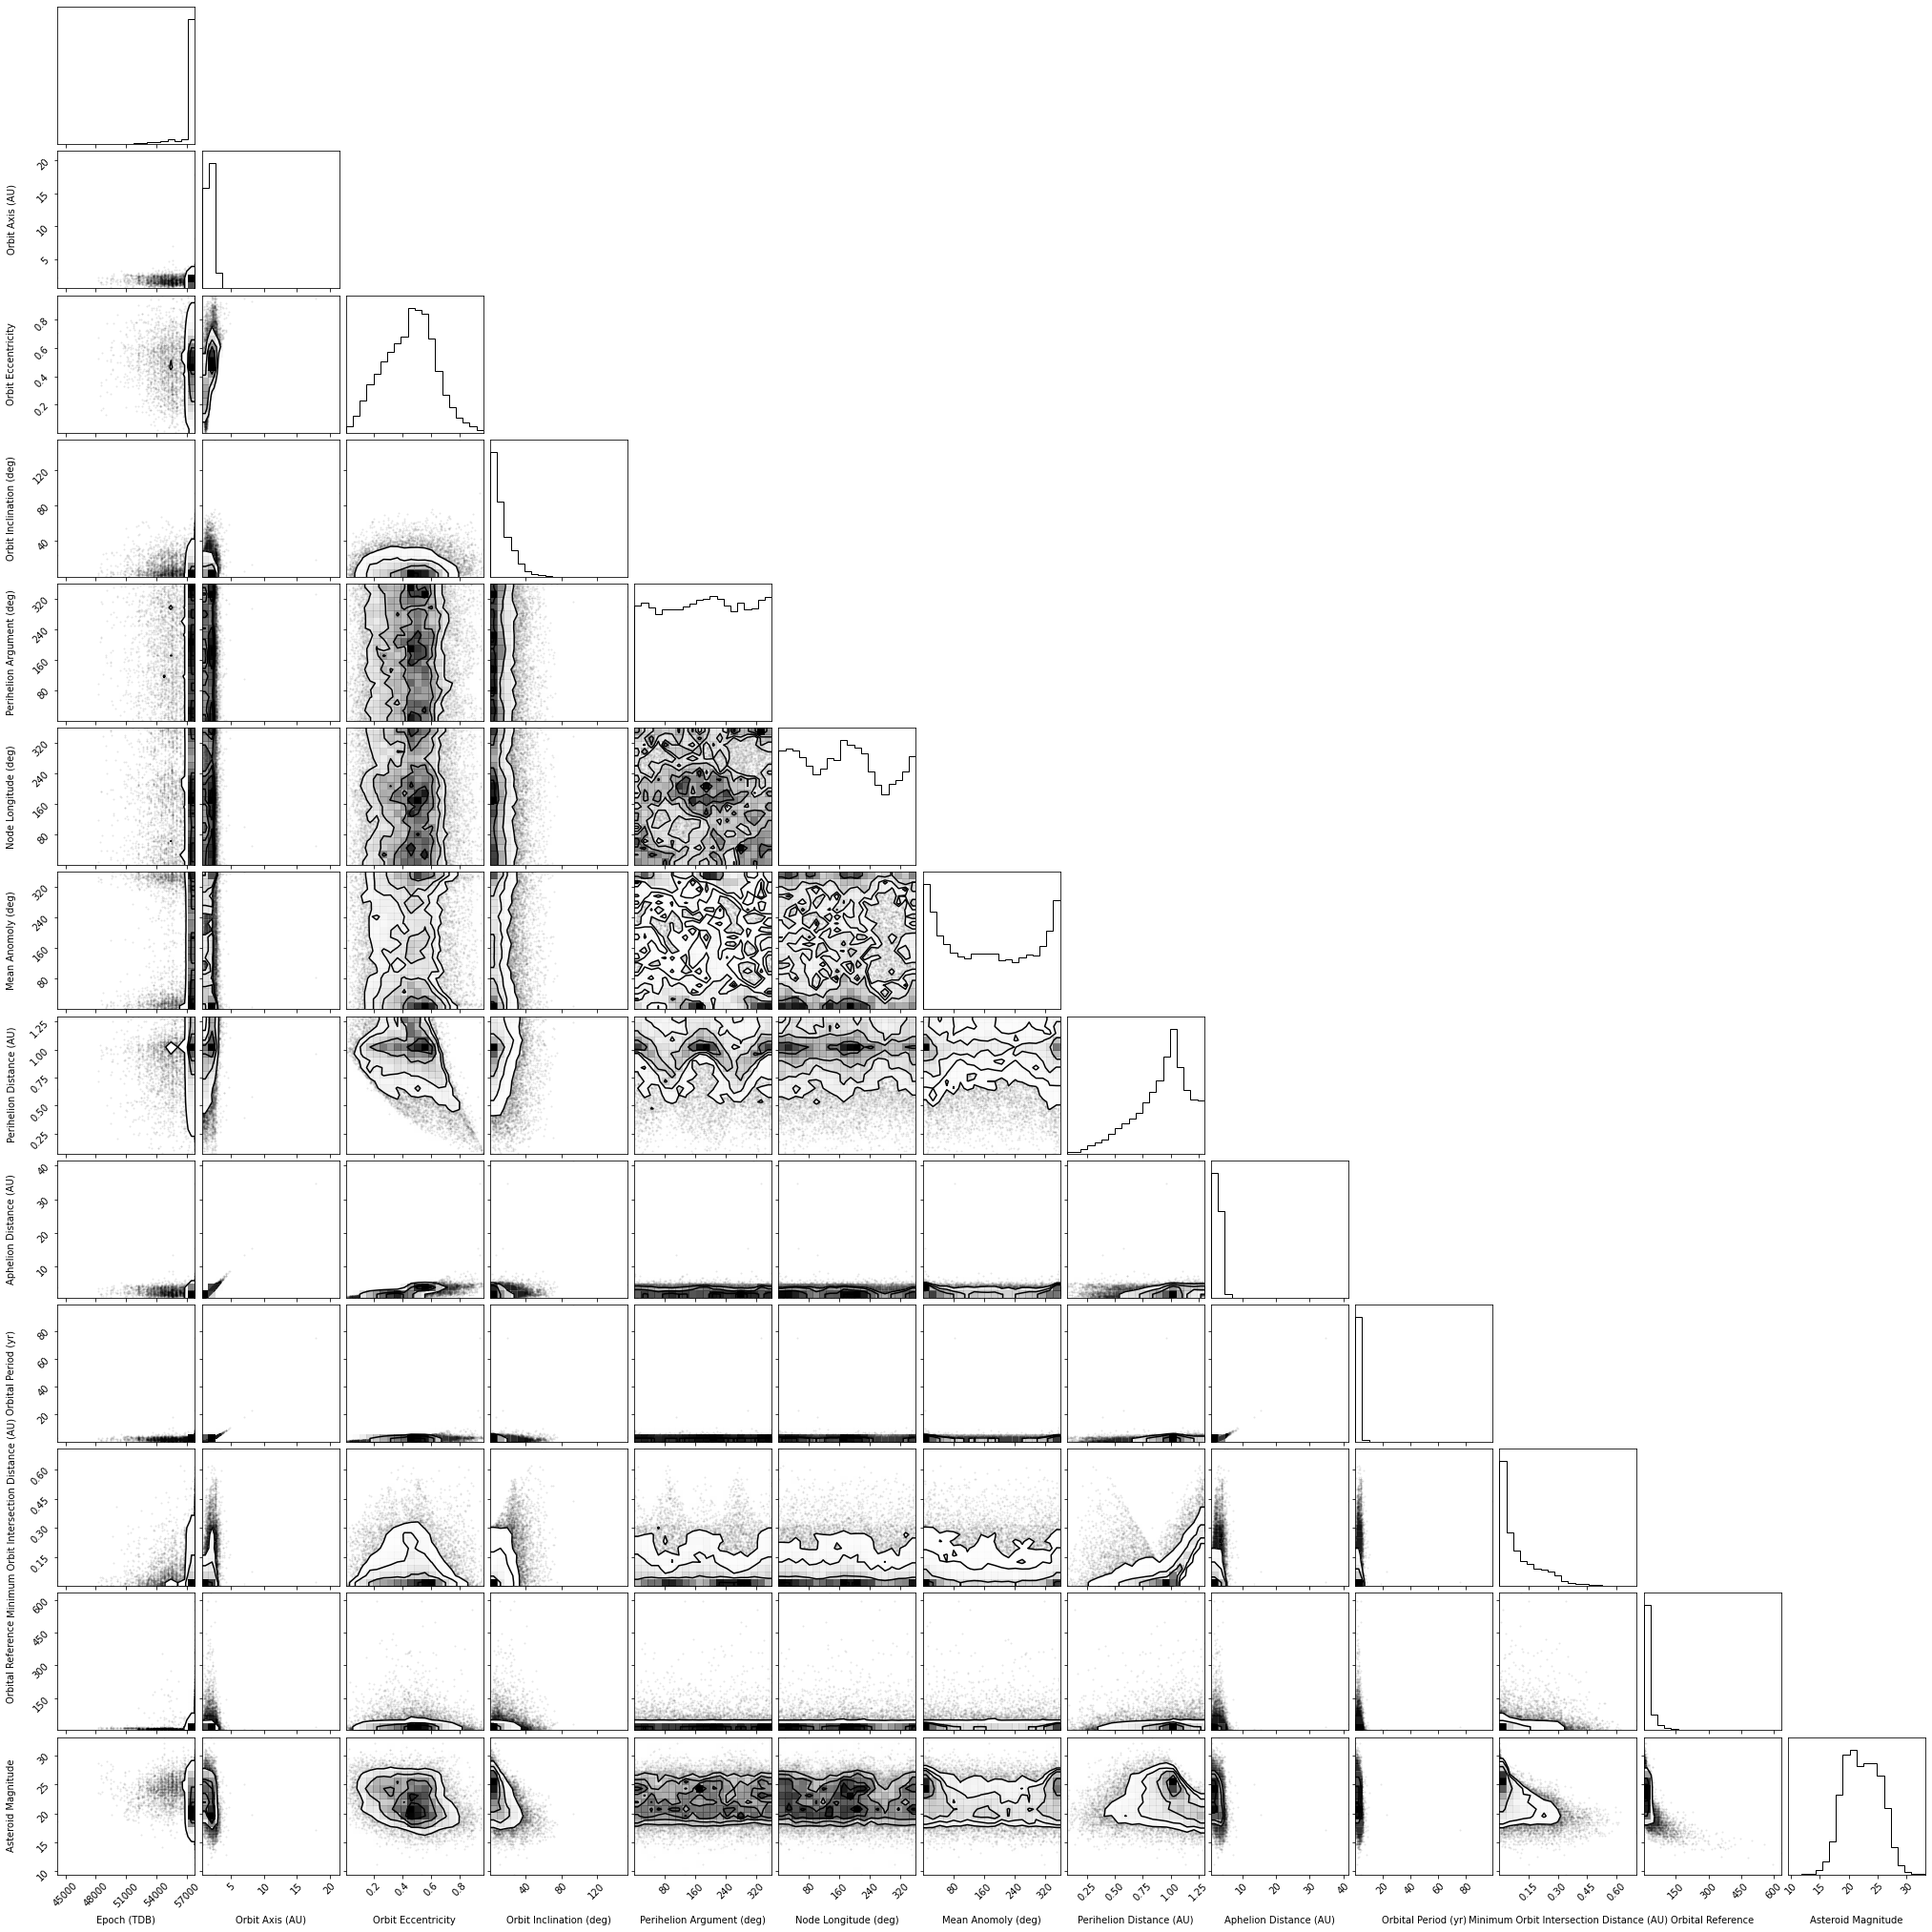

In [160]:
#https://github.com/kpenev/poet_ic_solver/blob/master/corner_plot.py
%pip install corner
import corner
corner.corner(numerical_data,range=ranges,labels=numerical_data.columns)

In [161]:
correlation_matrix['Hazardous'].sort_values()

Minimum Orbit Intersection Distance (AU)   -0.27
Asteroid Magnitude                         -0.27
Perihelion Distance (AU)                   -0.24
Orbit Axis (AU)                            -0.02
Orbital Period (yr)                        -0.01
Perihelion Argument (deg)                  -0.00
Node Longitude (deg)                       -0.00
Orbit Inclination (deg)                     0.01
Mean Anomoly (deg)                          0.02
Aphelion Distance (AU)                      0.03
Epoch (TDB)                                 0.06
Orbit Eccentricity                          0.16
Orbital Reference                           0.21
Hazardous                                   1.00
Name: Hazardous, dtype: float64

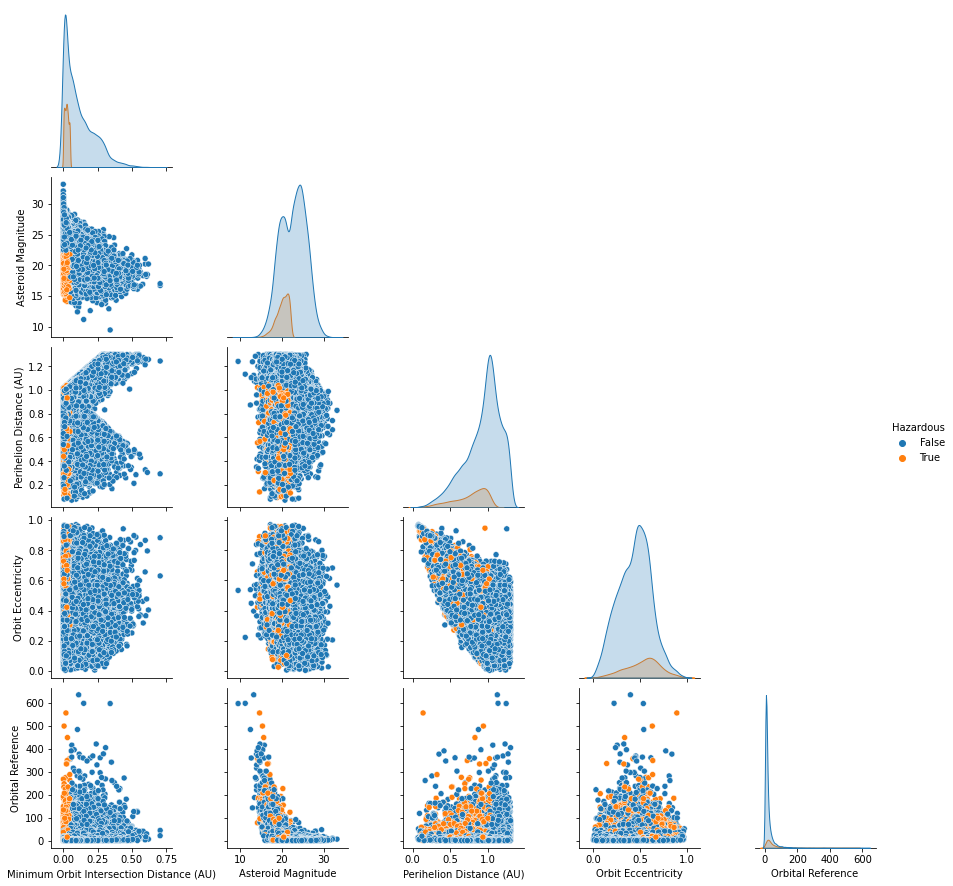

In [162]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
#plotting the most correlated features
most_correlated_features = data[['Minimum Orbit Intersection Distance (AU)','Asteroid Magnitude', 'Perihelion Distance (AU)', 'Orbit Eccentricity', 'Orbital Reference','Hazardous']]
sns.pairplot(most_correlated_features, hue="Hazardous", corner=True)

In [163]:
#https://www.tutorialspoint.com/python_data_science/python_measuring_central_tendency.htm
print("MEAN")
print(most_correlated_features.drop(["Hazardous"], axis=1).mean())

print("\nMEDIAN")
print(most_correlated_features.drop(["Hazardous"], axis=1).median())

MEAN
Minimum Orbit Intersection Distance (AU)     0.101881
Asteroid Magnitude                          22.286336
Perihelion Distance (AU)                     0.914899
Orbit Eccentricity                           0.449703
Orbital Reference                           21.886210
dtype: float64

MEDIAN
Minimum Orbit Intersection Distance (AU)     0.06200
Asteroid Magnitude                          22.20000
Perihelion Distance (AU)                     0.96580
Orbit Eccentricity                           0.46295
Orbital Reference                           11.00000
dtype: float64


In [164]:
#https://www.tutorialspoint.com/python_data_science/python_measuring_variance.htm
print("Standard Deviation")
print(most_correlated_features.drop(['Hazardous'], axis=1).std())

print("\nSKEW")
print(most_correlated_features.drop(['Hazardous'], axis=1).skew())

Standard Deviation
Minimum Orbit Intersection Distance (AU)     0.105940
Asteroid Magnitude                           3.016002
Perihelion Distance (AU)                     0.240310
Orbit Eccentricity                           0.176002
Orbital Reference                           33.632956
dtype: float64

SKEW
Minimum Orbit Intersection Distance (AU)    1.329231
Asteroid Magnitude                          0.025449
Perihelion Distance (AU)                   -0.759198
Orbit Eccentricity                         -0.040527
Orbital Reference                           5.710035
dtype: float64


The distribution of MOID is skewed to the right since its skew value is more than 1. The other features' skew is between -1 and 1, so they are symmetric.

# Data Preprocessing

In [165]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = most_correlated_features.drop(['Hazardous'], axis=1)
y = data["Hazardous"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)
table = []
table.append(['Model','Accuracy','Precision','Recall'])

In [166]:
#https://colab.research.google.com/drive/1coQx_fGMyiOhli6xjETUaXfy3AX1PqWX
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(x_train)
d = preprocessing.normalize(x_train)
x_train_norm = pd.DataFrame(d, columns=x_train.columns)
x_train_norm.head()

scaler2 = preprocessing.StandardScaler().fit(x_test)
d2 = preprocessing.normalize(x_test)
x_test_norm = pd.DataFrame(d2, columns=x_test.columns)
x_test_norm.head()

#x_train_norm = scaler.transform(x_train)
#x_test_norm = scaler.transform(x_test)

,Minimum Orbit Intersection Distance (AU),Asteroid Magnitude,Perihelion Distance (AU),Orbit Eccentricity,Orbital Reference
0,0.001392,0.512623,0.020033,0.007494,0.858346
1,0.000452,0.873488,0.029687,0.025466,0.485271
2,0.000172,0.445298,0.012232,0.014107,0.895188
3,0.002798,0.937775,0.041170,0.014239,0.344489
4,0.000539,0.975232,0.035090,0.004581,0.218335


# Model Fitting

##K-Nearest Neighbors

### K-Nearest Neighbors (Without Normalization)

In [167]:
len(x_test)

3127

In [168]:
#Import knearest neighbors Classifier model. K = 1
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

def knn(x_train, K):
  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=K)

  #Train the model using the training sets
  knn.fit(x_train, y_train)

  #Predict the response for test dataset
  y_pred = knn.predict(x_test)
  y_pred_train = knn.predict(x_train)

  # Model Accuracy, how often is the classifier correct?
  train_acc = metrics.accuracy_score(y_train, y_pred_train)
  test_acc = metrics.accuracy_score(y_test, y_pred)
  #print("Train Accuracy:")
  #print("Test Accuracy:")
  return train_acc,test_acc

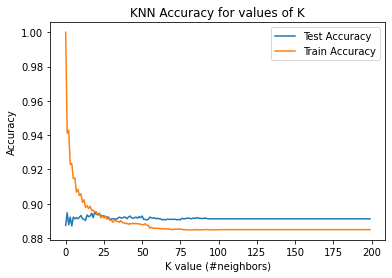

In [169]:
all_acc_test = []
all_acc_train = []
max_acc = 0
k = 0
for i in range(1,201):
  curr_acc_train,curr_acc_test = knn(x_train,i)
  all_acc_test.append(curr_acc_test)
  all_acc_train.append(curr_acc_train)
  if(curr_acc_test > max_acc):
    max_acc = curr_acc_test
    k=i
#print("K =", i, "\nAccuracy:", max_acc)
plt.title("KNN Accuracy for values of K")
plt.plot(all_acc_test, label = 'Test Accuracy')
plt.plot(all_acc_train, label = 'Train Accuracy')
plt.xlabel("K value (#neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

For small values of K, the model is overfiting since the difference between train and test accuracy is greater compared to higher values of K. Also, higher K values seem to generalize better.

### K-Nearest Neighbors (With Normalization)

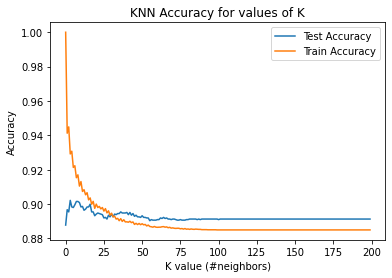

In [170]:
all_acc_test_norm = []
all_acc_train_norm = []
max_acc = 0
k = 0
for i in range(1,201):
  curr_acc_train,curr_acc_test = knn(x_train_norm,i)
  all_acc_test_norm.append(curr_acc_test)
  all_acc_train_norm.append(curr_acc_train)
  if(curr_acc_test > max_acc):
    max_acc = curr_acc_test
    k=i
#print("K =", i, "\nAccuracy:", max_acc)
plt.title("KNN Accuracy for values of K")
plt.plot(all_acc_test_norm, label = 'Test Accuracy')
plt.plot(all_acc_train_norm, label = 'Train Accuracy')
plt.xlabel("K value (#neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion: Normalization did not have a drastic effect on the accuracy of K-Nearest Neighbors. 

### K-Nearest Neighbors Summary

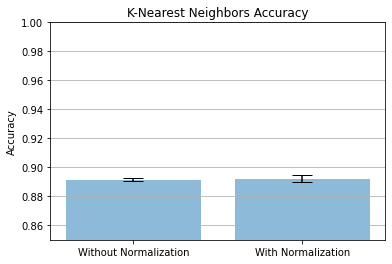

In [171]:
#all_acc_test
#all_acc_test_norm
test_mean = np.mean(all_acc_test)
test_norm_mean = np.mean(all_acc_test_norm)
test_std = np.std(all_acc_test)
test_norm_std = np.std(all_acc_test_norm)
values = [test_mean, test_norm_mean]
errors = [test_std, test_norm_std]
fig, ax = plt.subplots()

ax.bar(np.arange(2), values, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Without Normalization', 'With Normalization'])
ax.set_title('K-Nearest Neighbors Accuracy')
ax.yaxis.grid(True)

# Save the figure and show
#plt.tight_layout()
plt.ylim(.85, 1)
plt.show()

Optimum K-value = 50-75

[[2783    4]
 [ 338    2]]


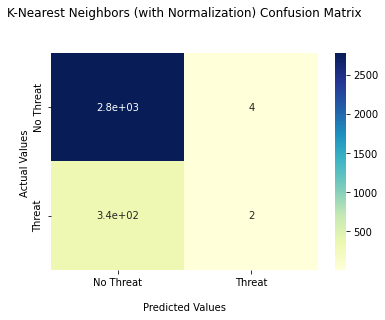

Accuracy: 0.891
Precision: 0.333
Recall: 0.006


In [172]:
knn = KNeighborsClassifier(n_neighbors=60)

#Train the model using the training sets
knn.fit(x_train_norm, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test_norm)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('K-Nearest Neighbors (with Normalization) Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['K-Nearest Neighbors (with normalization)',accuracy,precision,recall])

[[2785    2]
 [ 338    2]]


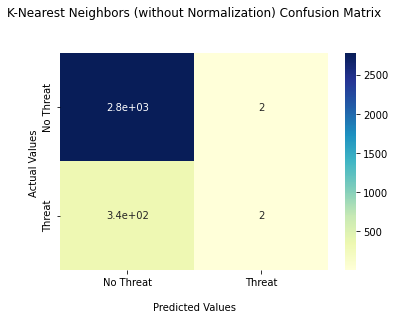

Accuracy: 0.891
Precision: 0.5
Recall: 0.006


In [173]:
knn = KNeighborsClassifier(n_neighbors=60)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('K-Nearest Neighbors (without Normalization) Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['K-Nearest Neighbors (without normalization)',accuracy,precision,recall])

##Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree(x_train, depth):
  dtree = DecisionTreeClassifier(criterion="gini", random_state=12,max_depth=2, min_samples_leaf=2)   
  dtree.fit(x_train,y_train)
  return dtree

In [175]:
from sklearn.metrics import accuracy_score
dtree = decision_tree(x_train, 2)
y_predict = dtree.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['Decision Tree',accuracy,precision,recall])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Naive Bayes

[[2747   40]
 [  82  258]]


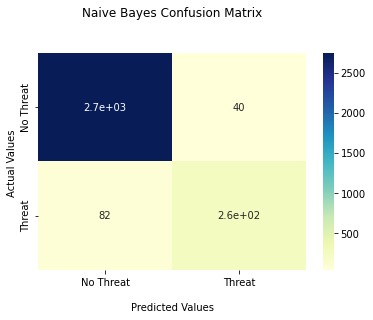

Accuracy: 0.961
Precision: 0.866
Recall: 0.759


In [177]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
y_pred = nb.fit(x_train, y_train).predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['Naive Bayes',accuracy,precision,recall])

## Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def logistic_regression(x_train1,x_test1,append):
  logreg = LogisticRegression()
  logreg.fit(x_train1,y_train)
  y_pred=logreg.predict(x_test1)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  print(cnf_matrix)
  ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ax.xaxis.set_ticklabels(['No Threat','Threat'])
  ax.yaxis.set_ticklabels(['No Threat','Threat'])
  plt.show()
  accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
  precision = round(metrics.precision_score(y_test, y_pred),3)
  recall = round(metrics.recall_score(y_test, y_pred),3)
  print("Accuracy:",accuracy)
  print("Precision:",precision)
  print("Recall:",recall)
  table.append(['Logistic Regression'+append,accuracy,precision,recall])

  #Recall meaning: If an astroid is a threat, then the model can detect it 53% of the time
  y_pred_proba = logreg.predict_proba(x_test1)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="Test Set,Area Under Curve="+str(auc))
  plt.legend(loc=4)
  plt.show()

[[2738   49]
 [ 152  188]]


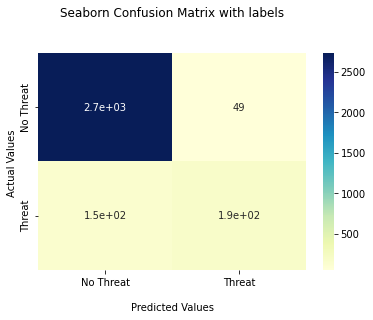

Accuracy: 0.936
Precision: 0.793
Recall: 0.553


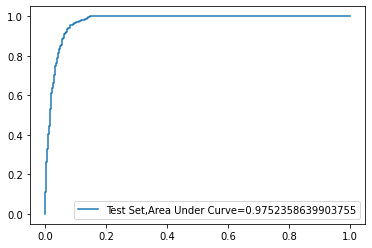

In [179]:
lr = logistic_regression(x_train,x_test,"(without normalization)")

[[2787    0]
 [ 340    0]]


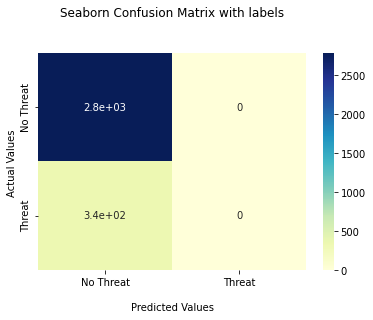

Accuracy: 0.891
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


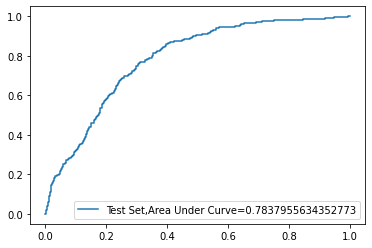

In [180]:
lr_norm = logistic_regression(x_train_norm,x_test_norm,"(with normalization)")

Conclusion: Normalizing again did not help the accuracy, confusion matrix, and ROC curve in the case of logistic regression. More research has to be done to figure out why this is the case.

## Neural Network

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[[2741   46]
 [  84  256]]


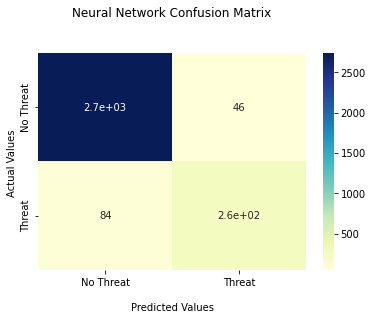

Accuracy: 0.958
Precision: 0.848
Recall: 0.753


In [181]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=50)
mlp.fit(x_train,y_train.values.ravel())
y_pred = mlp.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('Neural Network Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['Neural Network',accuracy,precision,recall])

##Summary

In [182]:
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════════════════════════╤════════════╤═════════════╤══════════╕
│ Model                                       │   Accuracy │   Precision │   Recall │
╞═════════════════════════════════════════════╪════════════╪═════════════╪══════════╡
│ K-Nearest Neighbors (with normalization)    │      0.891 │       0.333 │    0.006 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ K-Nearest Neighbors (without normalization) │      0.891 │       0.5   │    0.006 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ Decision Tree                               │      1     │       1     │    1     │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ Naive Bayes                                 │      0.961 │       0.866 │    0.759 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ Logistic Regression(without normalization)  │      0